In [1]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from keras.preprocessing.image import img_to_array
from keras.optimizers import SGD
# from nn.conv import LeNet
# from utils.captchahelper import preprocess
# from utils.cnnhelper import plotHistory
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os

In [3]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Flatten, Dense
from keras import backend as K

class LeNet:
    @staticmethod
    def build(width, height, depth, classes):
        # initialize the model along with the input shape to be
        # "channels last"
        model = Sequential()
        inputShape = (height, width, depth)

        # if we are using "channels first", update the input shape
        if K.image_data_format == "channels_first":
            inputShape = (depth, height, width)
        
        # define the first (and only) CONV => RELU layer
        model.add(Conv2D(20, (5,5), padding="same", input_shape=inputShape))
        model.add(Activation("relu"))
        model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
        
        model.add(Conv2D(50, (5,5), padding="same"))
        model.add(Activation("relu"))
        model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

        # softmax classifier
        model.add(Flatten())
        model.add(Dense(500))
        model.add(Activation("relu"))
        
        model.add(Dense(classes))
        model.add(Activation("softmax"))

        return model


In [8]:
import imutils
import cv2

def preprocess(image, width, height):
    # grab the dimensions of the image, then initialize the padding values
    (h, w) = image.shape[:2]

    # if the width is greater than the height then resize along the width
    if w > h:
        image = imutils.resize(image, width=width)
    
    # otherwise, the height is greater than the width so resize along the height
    else:
        image = imutils.resize(image, height=height)
    
    # determine the padding values for the width and height to 
    # obtain the target dimensions

    padW = int((width - image.shape[1]) / 2.0)
    padH = int((height - image.shape[0]) / 2.0)

    # pad the image then apply one more resizing to handle any rounding issues
    image = cv2.copyMakeBorder(image, padH, padH, padW, padW, cv2.BORDER_REPLICATE)
    image = cv2.resize(image, (width, height))

    # return the pre-processed image
    return image

In [64]:
import matplotlib.pyplot as plt
import numpy as np

def plotHistory(H, numEpochs):
    # plot the training loss and accuracy
    plt.style.use("ggplot")
    plt.figure()
    plt.plot(np.arange(0, numEpochs), H.history["loss"], label="train_loss")
    plt.plot(np.arange(0, numEpochs), H.history["val_loss"], label="val_loss")
    plt.plot(np.arange(0, numEpochs), H.history["accuracy"], label="train_accuracy")   # Sửa lại ở đây
    plt.plot(np.arange(0, numEpochs), H.history["val_accuracy"], label="val_accuracy") # Và ở đây
    plt.title("Training Loss and Accuracy")
    plt.xlabel("Epoch #")
    plt.ylabel("Loss/Accuracy")
    plt.legend()
    plt.show()

In [52]:
datasetPath = "C:/Users/hung0/Documents/IUH/computer_vision/BaiTapTuan/Week_9/Chapter21/captcha_breaker/dataset"
numEpochs   = 15

In [54]:
from imutils import paths

imagePaths = list(paths.list_images(datasetPath))
print("[INFO] Found {} images".format(len(imagePaths)))

[INFO] Found 2012 images


In [53]:
# initialize the data and labels
data = []
labels = []

In [55]:
# loop over the input images
for imagePath in paths.list_images(datasetPath):
    # load the image, pre-process it, and store it in the data list
    image = cv2.imread(imagePath)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    image = preprocess(image, 28, 28)
    image = img_to_array(image)
    data.append(image)

    # extract the class label from the image path and update the labels list
    label = imagePath.split(os.path.sep)[-2]
    labels.append(label)

In [56]:
# scale the raw pixel intensities to the range [0, 1]
data = np.array(data, dtype="float") / 255.0
labels = np.array(labels)

In [57]:
# partition the data into training and testing splits using 75% of
# the data for training and the remaining 25% for testing
(trainX, testX, trainY, testY) = train_test_split(data, labels, test_size=0.25, 
                                            random_state=42)

In [58]:
# convert the labels from integers to vectors
labelBinarizer = LabelBinarizer().fit(trainY)
trainY = labelBinarizer.transform(trainY)
testY  = labelBinarizer.transform(testY)

In [60]:
# initialize the model
print("[INFO] compiling model...")
model = LeNet.build(width=28, height=28, depth=1, classes=9)
opt = SGD(learning_rate=0.01)
model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])


[INFO] compiling model...


In [61]:
# train the network
print("[INFO] training network...")
history = model.fit(trainX, trainY, validation_data=(testX, testY), 
                    batch_size=32, epochs=numEpochs, verbose=1)


[INFO] training network...
Epoch 1/15
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.1527 - loss: 2.1853 - val_accuracy: 0.2286 - val_loss: 2.1419
Epoch 2/15
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.2979 - loss: 2.1216 - val_accuracy: 0.1849 - val_loss: 2.1072
Epoch 3/15
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.3799 - loss: 2.0437 - val_accuracy: 0.1014 - val_loss: 2.0088
Epoch 4/15
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.5444 - loss: 1.9045 - val_accuracy: 0.6521 - val_loss: 1.6606
Epoch 5/15
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.8085 - loss: 1.5070 - val_accuracy: 0.5626 - val_loss: 1.1888
Epoch 6/15
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9291 - loss: 0.8390 - val_accuracy: 0.6461 - val_loss: 0.7280
Epoch 7/15
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9625 - loss: 0.3288 - val_accuracy: 1.0000 - val_loss: 0.1600
Epoch 8/15
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9996 - loss: 0.1200

In [62]:
# evaluate the network
print("[INFO] evaluating network...")
predictions = model.predict(testX, batch_size=32)
print(classification_report(testY.argmax(axis=1), 
            predictions.argmax(axis=1), target_names=labelBinarizer.classes_))


[INFO] evaluating network...
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        51
           2       1.00      1.00      1.00        75
           3       1.00      1.00      1.00        57
           4       1.00      1.00      1.00        43
           5       1.00      1.00      1.00        55
           6       1.00      1.00      1.00        63
           7       1.00      1.00      1.00        64
           8       1.00      1.00      1.00        49
           9       1.00      1.00      1.00        46

    accuracy                           1.00       503
   macro avg       1.00      1.00      1.00       503
weighted avg       1.00      1.00      1.00       503



[INFO] serializing network...


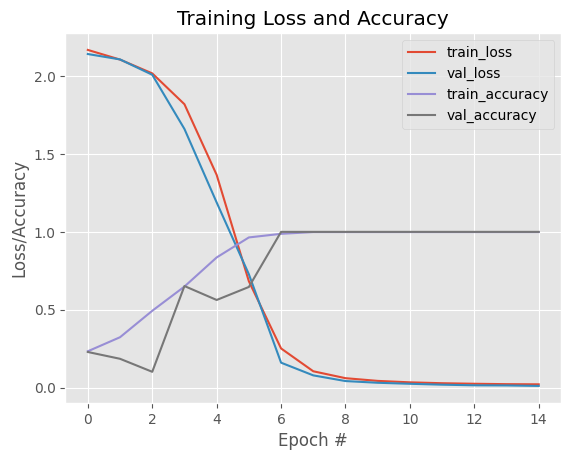

In [66]:
# save the model to disk
print("[INFO] serializing network...")
model.save("lenet.hdf5")

plotHistory(history, numEpochs)